In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

1.12.0
2.1.6-tf


In [3]:
# matplotlib 高清显示
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format ='retina'

### 导入 Fashion MNIST 数据集
`Fashion-MNIST`是一个替代[MNIST手写数字集](http://yann.lecun.com/exdb/mnist/)的图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的[研究部门](https://research.zalando.com/)提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且**不需要**改动任何的代码。

本指南使用 Fashion MNIST 实现多样化，并且它比常规 MNIST 更具挑战性。这两个数据集都相对较小，用于验证某个算法能否如期正常运行。它们都是测试和调试代码的良好起点。

我们将使用 60000 张图像训练网络，并使用 10000 张图像评估经过学习的网络分类图像的准确率。

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


加载数据集会返回 4 个 `NumPy` 数组：
`train_images` 和 `train_labels` 数组是训练集，即模型用于学习的数据。
1. 测试集 `test_images` 和 `test_labels` 数组用于测试模型。
2. 图像为 28x28 的 `NumPy` 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像代表的服饰所属的类别：

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 预处理数据
必须先对数据进行预处理，然后再训练网络。如果您检查训练集中的第一张图像，就会发现像素值介于 0 到 255 之间：

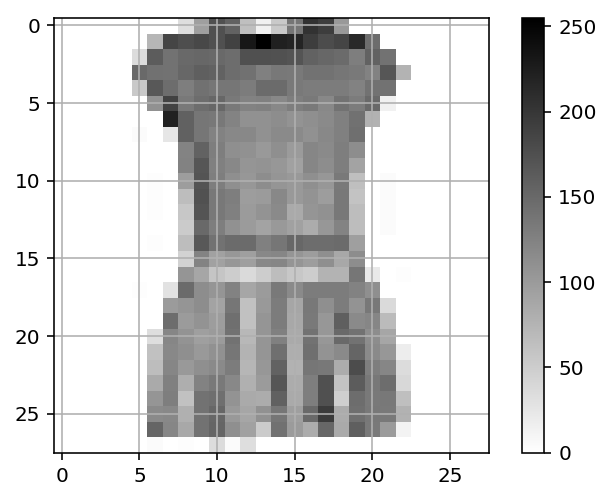

In [7]:
plt.figure()
# plt.imshow(train_images[3])
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)

我们将这些值缩小到 0 到 1 之间，然后将其馈送到神经网络模型。为此，将图像组件的数据类型从整数转换为浮点数，然后除以 255。以下是预处理图像的函数：

务必要以相同的方式对训练集和测试集进行预处理：

In [8]:
print(train_images[3]) # 未标准化前的数值

[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 10

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

显示训练集中的前 36 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了。

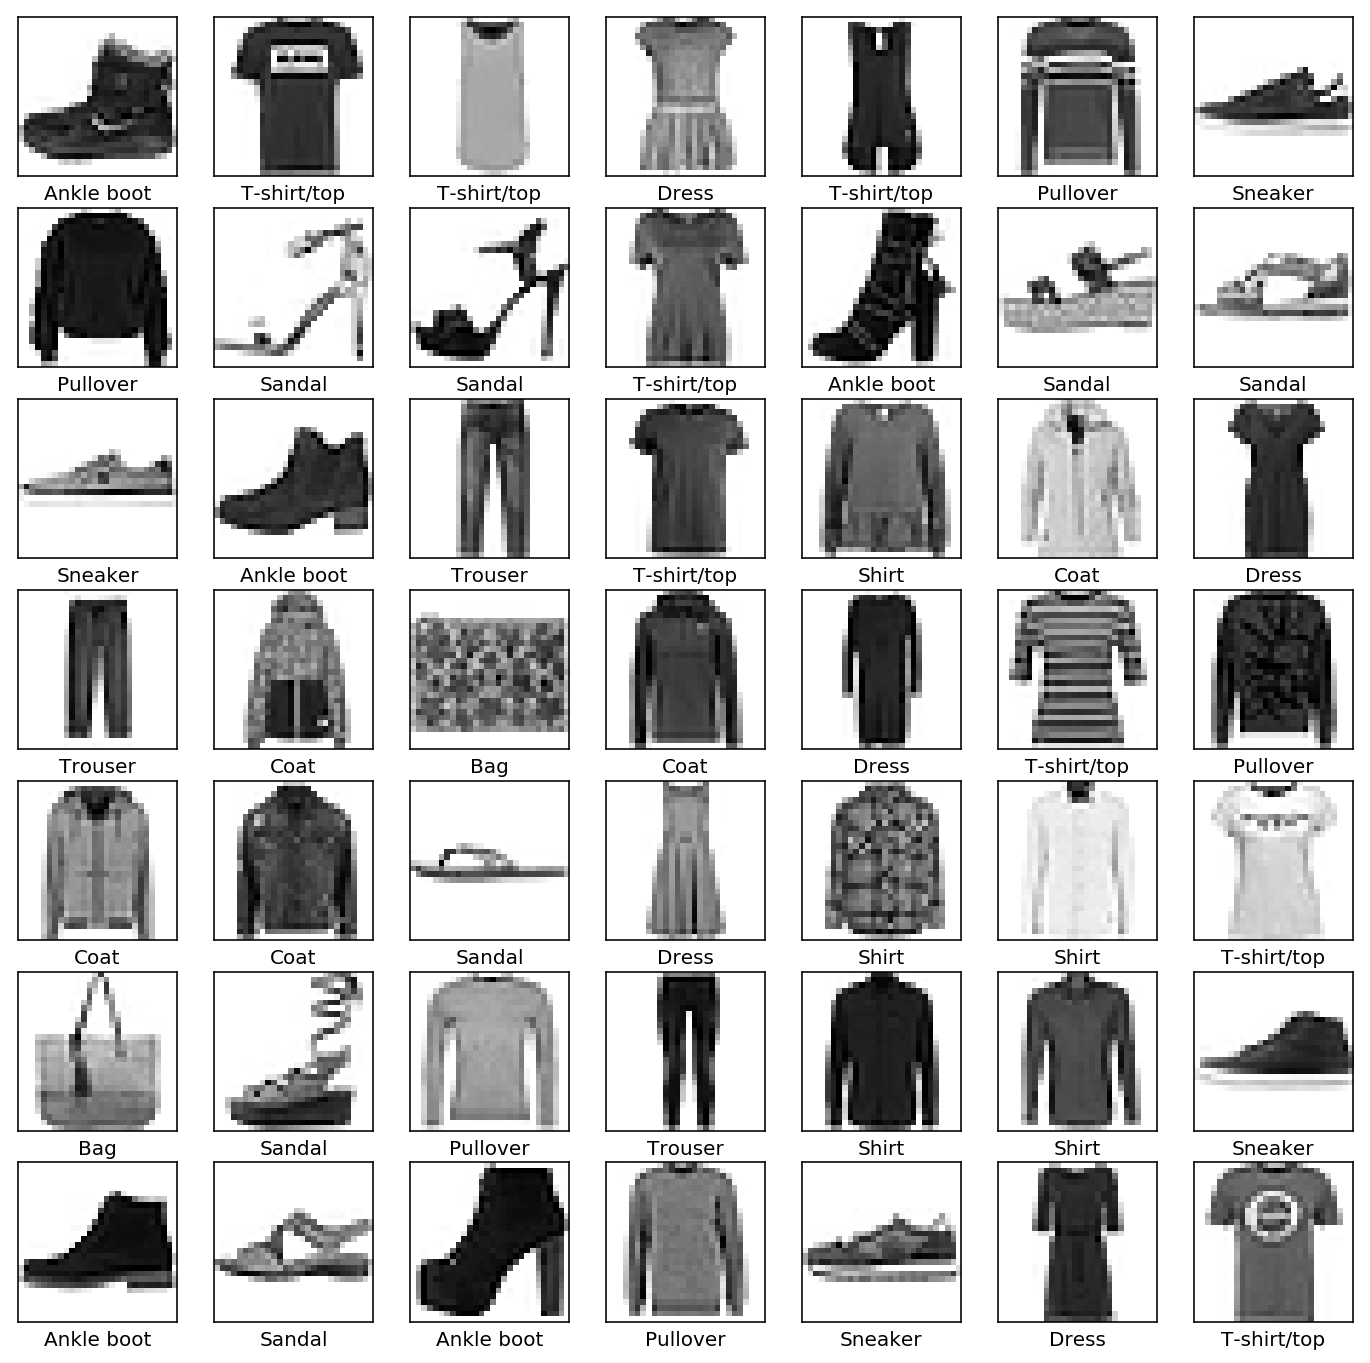

In [10]:
plt.figure(figsize=(12,12))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

In [11]:
print(train_images[3])
print(train_labels[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.12941176 0.37647059 0.68627451 0.61176471
  0.25098039 0.05490196 0.21176471 0.5372549  0.8        0.76078431
  0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.28627451 0.72941176 0.69411765 0.71764706 0.68627451 0.7372549
  0.90980392 1.         0.8745098  0.85882353 0.76078431 0.70196078
  0.72941176 0.83529412 0.57254902 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.1372549
  0.63921569 0.54901961 0.58823529 0.59607843 0.58823529 0.57254902
  0.68627451 0.68627451 0.67843137 0.67058824 0.61176471 0.59607843
  0.58039216 0.50588235 0.61176471 0.54901961 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.58823529
  0.55686275 0.54

### 构建模型
构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层
神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果。希望这些表示结果有助于解决手头问题。

大部分深度学习都会把简单的层连在一起。大部分层（例如 tf.keras.layers.Dense）都具有在训练期间要学习的参数。

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28),  name='input_layer'),
    keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_layer1'),
    keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_layer2'),
    keras.layers.Dense(10, activation=tf.nn.softmax, name='output_layer')
])

该网络中的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）。可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。

在扁平化像素之后，该网络包含两个 tf.keras.layers.Dense 层的序列。这些层是密集连接或全连接神经层。第一个 Dense 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

### 编译模型
模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：

* 损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
* 优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
* 指标 - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

### tf.keras.Model.compile 采用三个重要参数：

* `optimizer`：此对象会指定训练过程。从 tf.train 模块向其传递优化器实例，例如 `tf.train.AdamOptimizer`、`tf.train.RMSPropOptimizer` 或 `f.train.GradientDescentOptimizer`。
* `loss`：要在优化期间最小化的函数。常见选择包括均方误差 (`mse`)、`categorical_crossentropy` 和 `binary_crossentropy`。损失函数由名称或通过从 `tf.keras.losses` 模块传递可调用对象来指定。
* `metrics`：用于监控训练。它们是 `tf.keras.metrics` 模块中的字符串名称或可调用对象。

In [18]:
# model.compile(optimizer=tf.train.AdamOptimizer(0.01),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# 模型参数摘要
# model.get_weights()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               100480    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### 训练模型
训练神经网络模型需要执行以下步骤：

将训练数据馈送到模型中，在本示例中为 `train_images` 和 `train_labels` 数组。
1. 模型学习将图像与标签相关联。
2. 我们要求模型对测试集进行预测，在本示例中为 `test_images` 数组。我们会验证预测结果是否与 `test_labels` 数组中的标签一致。
3. 要开始训练，请调用 `model.fit` 方法，使模型与训练数据“拟合”：

### 回调
回调是传递给模型的对象，用于在训练期间自定义该模型并扩展其行为。您可以编写自定义回调，也可以使用包含以下方法的内置 `tf.keras.callbacks`：

1. `tf.keras.callbacks.ModelCheckpoint`：定期保存模型的检查点。
2. `tf.keras.callbacks.LearningRateScheduler`：动态更改学习速率。
3. `tf.keras.callbacks.EarlyStopping`：在验证效果不再改进时中断训练。
4. `tf.keras.callbacks.TensorBoard`：使用 TensorBoard 监控模型的行为。
要使用 `tf.keras.callbacks.Callback`，请将其传递给模型的 `fit`方法：

In [15]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
#   tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [38]:
model.fit(train_images, train_labels, epochs=5, callbacks=callbacks)

Epoch 1/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.5517 - acc: 0.8032
Epoch 2/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.4470 - acc: 0.8407
Epoch 3/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.4203 - acc: 0.8503
Epoch 4/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.4057 - acc: 0.8565
Epoch 5/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.4018 - acc: 0.8586


In [39]:
model.summary()

# Save weights to a TensorFlow Checkpoint file
model.save_weights('./weights/my_model')

# Restore the model's state,
# this requires a model with the same architecture.
# model.load_weights('./weights/my_model')

# Save weights to a HDF5 file
model.save_weights('./weights/my_model.h5', save_format='h5')

# Restore the model's state
# model.load_weights('my_model.h5')

# 默认情况下，会以 TensorFlow 检查点文件格式保存模型的权重。权重也可以另存为 Keras HDF5 格式

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               100480    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### 评估准确率
接下来，比较一下模型在测试数据集上的表现：

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 143us/step
Test accuracy: 0.8508


结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。训练准确率和测试准确率之间的这种差异表示出现过拟合。如果机器学习模型在新数据上的表现不如在训练数据上的表现，就表示出现过拟合。

### 做出预测
模型经过训练后，我们可以使用它对一些图像进行预测。

In [41]:
predictions = model.predict(test_images)

In [42]:
print(predictions.shape)

(10000, 10)


In [43]:
print("Predicted Values:\n",predictions[2])
pred_idx = np.argmax(predictions[2])
print("\nThe highest probability index:",pred_idx)
print("\nPrediction:", class_names[pred_idx])
print("\nThe actual index:", test_labels[2])

Predicted Values:
 [2.39842321e-18 1.00000000e+00 4.84669425e-22 1.43562937e-14
 2.19723263e-12 0.00000000e+00 1.36763975e-17 0.00000000e+00
 5.19277726e-18 1.21807434e-34]

The highest probability index: 1

Prediction: Trouser

The actual index: 1


In [44]:
# 绘图函数
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

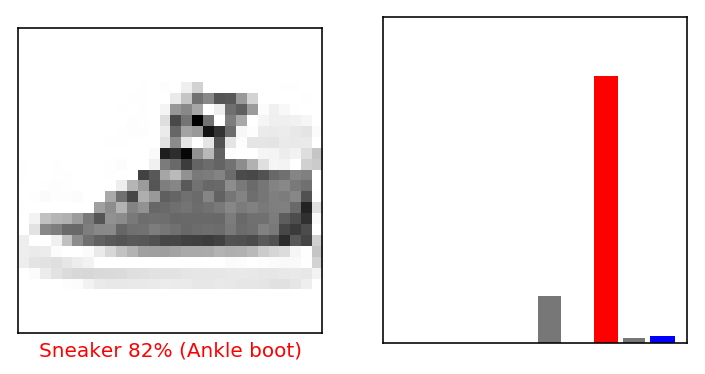

In [54]:
i = np.random.randint(100)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)

我们用它们的预测绘制几张图像。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。请注意，即使置信度非常高，也有可能预测错误。

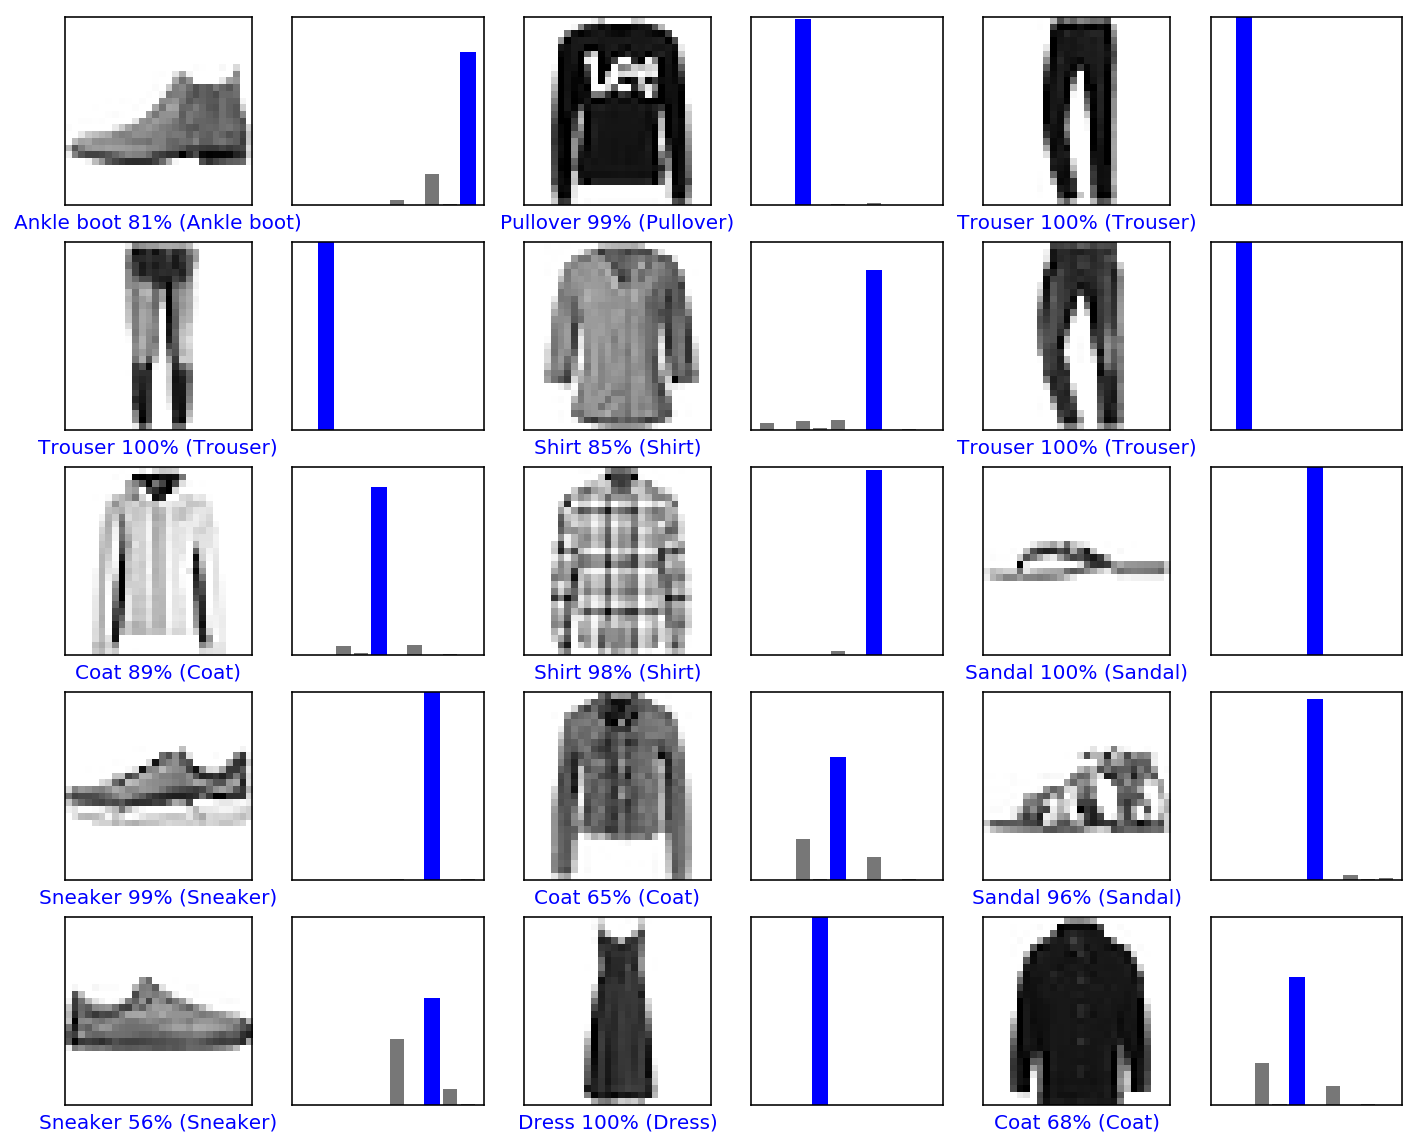

In [46]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(0, num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)